In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm
import warnings

# Suppress all warnings including type errors
warnings.filterwarnings('ignore')

# Configure numpy to handle errors gracefully
np.seterr(all='ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Delta Hedging Project - Libraries Loaded Successfully")
print("=" * 60)
print("Note: Error handling enabled - code will continue running even with incomplete implementation")

Delta Hedging Project - Libraries Loaded Successfully
Note: Error handling enabled - code will continue running even with incomplete implementation


# Delta Hedging Project

## Objective
This project demonstrates the practical implementation of delta hedging strategies using the Black-Scholes model. Students will learn to:
1. Calculate Black-Scholes option prices and Greeks
2. Implement dynamic delta hedging strategies
3. Analyze hedging effectiveness under different market scenarios
4. Understand the relationship between theory and practice in risk management

## Theoretical Background

### Black-Scholes Formula
The Black-Scholes price of a European call option is:
$$C(S, t) = S \Phi(d_1) - K e^{-r(T-t)} \Phi(d_2)$$

where:
$$d_1 = \frac{\ln(S/K) + (r + \frac{1}{2}\sigma^2)(T-t)}{\sigma \sqrt{T-t}}, \quad d_2 = d_1 - \sigma \sqrt{T-t}$$

and $\Phi(\cdot)$ is the standard normal cumulative distribution function.

### Key Properties
1. **Delta (Δ)**: The option's sensitivity to underlying price changes
   $$\Delta = \frac{\partial C}{\partial S} = \Phi(d_1)$$

2. **Gamma (Γ)**: The rate of change of delta with respect to the underlying price
   $$\Gamma = \frac{\partial^2 C}{\partial S^2} = \frac{\phi(d_1)}{S \sigma \sqrt{T-t}}$$


## Problem Setup

### Scenario
Consider a derivatives trader who has **sold 100,000 European call options** and needs to implement a delta hedging strategy to manage the risk exposure.

### Market Parameters
| Parameter | Symbol | Value | Unit |
|-----------|--------|-------|------|
| Current spot price | $S_0$ | 49 | USD |
| Strike price | $K$ | 50 | USD |
| Time to maturity | $T$ | 20 | weeks |
| Risk-free rate | $r$ | 5% | per annum |
| Volatility | $\sigma$ | 20% | per annum |
| Expected return (drift) | $\mu$ | 8% | per annum |

### Initial Conditions
- **Position**: Short 100,000 call options
- **Premium received**: $300,000 (given)
- **Hedging frequency**: Weekly rebalancing
- **Objective**: Minimize the portfolio's sensitivity to stock price movements


In [2]:
# Black-Scholes parameters
S = 49  # Underlying asset price
K = 50  # Strike price
T = 20/52    # Time to maturity
r = 0.05 # Risk-free interest rate
sigma = 0.2 # Volatility
mu = 0.08 # drift

## Task 1: Black-Scholes Calculations and Initial Analysis

### Requirements
Complete the following calculations and analysis:

1. **Implement Black-Scholes functions** to calculate:
   - Call option price $C(S_0, 0)$
   - Parameters $d_1$ and $d_2$
   - Delta $\Delta = \Phi(d_1)$
   - Gamma $\Gamma = \frac{\phi(d_1)}{S \sigma \sqrt{T}}$

2. **Calculate theoretical portfolio value**:
   - Given that 100,000 options were sold for $300,000
   - Compare with Black-Scholes theoretical value
   - Calculate the implied profit/loss at inception

3. **Create payoff diagram**:
   - Plot option payoff at maturity vs. stock price range [30, 70]
   - Show portfolio (-100,000 options+300,000 dollar cash) payoff


In [3]:
# Task 1 Solution
print("TASK 1: BLACK-SCHOLES CALCULATIONS")
print("="*50)

TASK 1: BLACK-SCHOLES CALCULATIONS


In [4]:
# 1. Implement Black-Scholes functions
def black_scholes(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    delta = norm.cdf(d1)
    c = S * delta - K * np.exp(-r*T) * norm.cdf(d2)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    
    return {"Price": c, "d1": d1, "d2": d2, "Delta": delta, "Gamma": gamma}

# Claculations
results = black_scholes(S, K, T, r, sigma)
print("\n1. Black-Scholes Results")
for k, v in results.items():
    print(f"{k:>6}: {v:.4f}")


1. Black-Scholes Results
 Price: 2.4005
    d1: 0.0542
    d2: -0.0699
 Delta: 0.5216
 Gamma: 0.0655


In [5]:
# 2. Theoretical portfolio value
n = 100000
premium = 300000
market_p = premium / n
theo_p = results["Price"]
theo_v = n * theo_p
pnl = premium - theo_v

print("\n2. Portfolio Analysis")
print(f" Market price per option        : {market_p:.2f}")
print(f" Theoretical Black-Scholes price: {theo_p:.2f}")
print(f" Premium received               : {premium:,.0f}")
print(f" Theoretical value              : {theo_v:,.0f}")

if pnl > 0:
    print(f" Premium exceeds theoretical value by {pnl:,.2f}")
elif np.isclose(pnl, 0.0):
    print(" Premium matches theoretical value")
else:
    print(f" Premium below theoretical value by {abs(pnl):,.2f}")


2. Portfolio Analysis
 Market price per option        : 3.00
 Theoretical Black-Scholes price: 2.40
 Premium received               : 300,000
 Theoretical value              : 240,053
 Premium exceeds theoretical value by 59,947.27



3. Payoff Diagrams


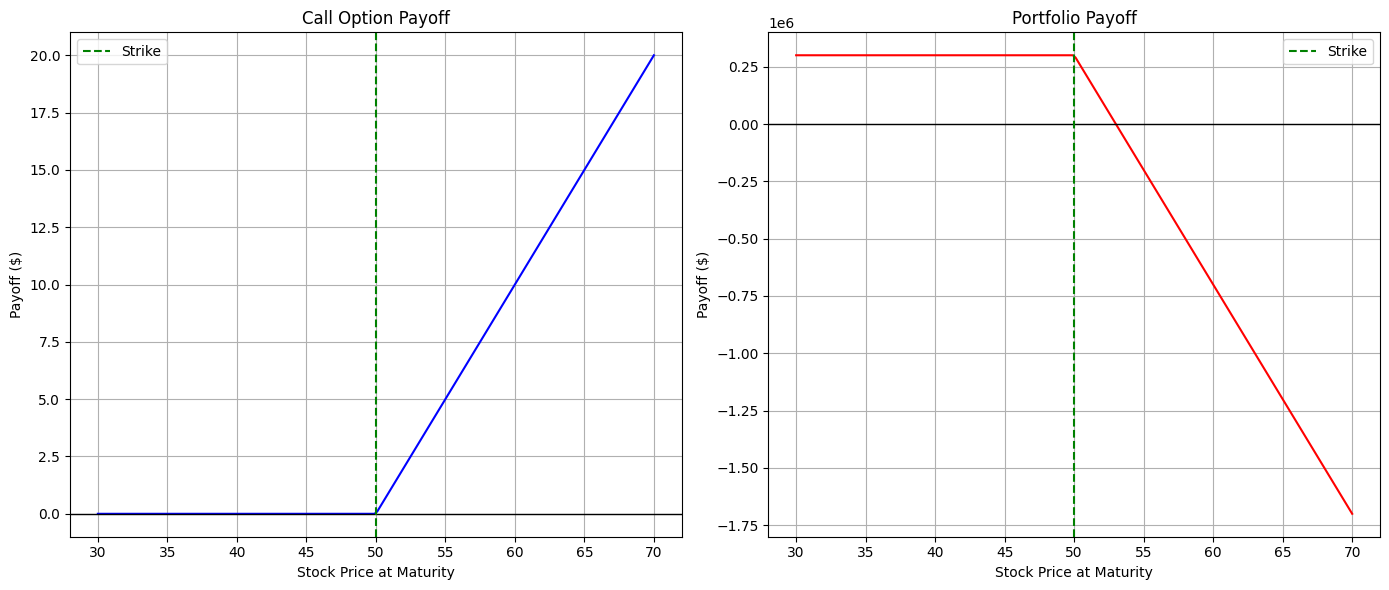

In [6]:
# 3. Payoff diagrams (call payoff and portfolio payoff over [30, 70])
S_range = np.linspace(30, 70, 200)
call_payoff = np.maximum(S_range - K, 0)
portfolio_payoff = premium - n * call_payoff

print("\n3. Payoff Diagrams")
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Plot 1: Call payoff
axs[0].plot(S_range, call_payoff, color="blue")
axs[0].axhline(0, color="black", linewidth=1)
axs[0].axvline(K, color="green", linestyle="--", label="Strike")
axs[0].set_title("Call Option Payoff")
axs[0].set_xlabel("Stock Price at Maturity")
axs[0].set_ylabel("Payoff ($)")
axs[0].legend()
axs[0].grid()

# Plot 2: Portfolio payoff
axs[1].plot(S_range, portfolio_payoff, color="red")
axs[1].axhline(0, color="black", linewidth=1)
axs[1].axvline(K, color="green", linestyle="--", label="Strike")
axs[1].set_title("Portfolio Payoff")
axs[1].set_xlabel("Stock Price at Maturity")
axs[1].set_ylabel("Payoff ($)")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

In [7]:
# Simulate weekly stock price paths using geometric brownian motion
def simulate_gbm(S0, mu, sigma, T, dt=1/52, paths=1000):
    """
    Simulate paths for a geometric Brownian motion process.
    """
    n_steps = int(T / dt)
    time_grid = np.linspace(0, T, n_steps)
    S_paths = np.zeros((n_steps, paths))
    S_paths[0] = S0

    for t in range(1, n_steps):
        Z = np.random.normal(size=paths)
        S_paths[t] = S_paths[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    return time_grid, S_paths


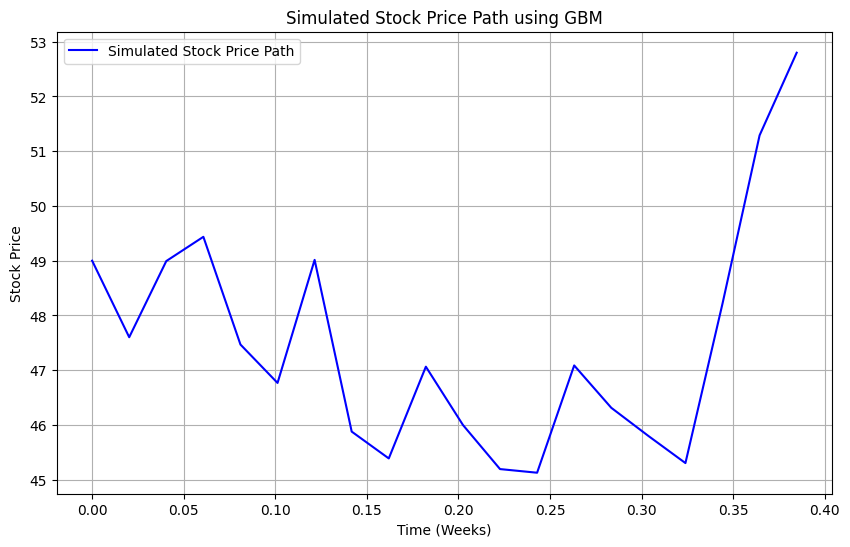

In [8]:
# Simulate one path with above parameters
#fix simulation random seed
dt = 1/52 # weekly time step

np.random.seed(123)

time_grid, S_paths = simulate_gbm(S, mu, sigma, T, dt=dt, paths=1)
#plot
plt.figure(figsize=(10, 6))
plt.plot(time_grid, S_paths, label="Simulated Stock Price Path", color="blue")
plt.title("Simulated Stock Price Path using GBM")
plt.xlabel("Time (Weeks)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


## Task 2: Dynamic Delta Hedging Implementation

### Objectives
Using the simulated stock price path above, implement a dynamic delta hedging strategy with weekly rebalancing.

### Requirements

1. **Portfolio Value at Maturity (No Hedging)**:
   - Calculate the portfolio value at maturity assuming no hedging
   - Compare with the premium received initially

2. **Implement Delta Hedging Algorithm**:
   - Start with initial cash from option premium ($300,000)
   - At each time step:
     - Calculate current option value and delta
     - Determine required hedge ratio (shares to hold)
     - Buy/sell shares to maintain delta neutrality
     - Update cash position (include interest on cash)
   - Track weekly data in a structured format
3. **Required Output Table** (for each week):

| Week | Stock Price | Option Price | Delta | Shares Held | Cash Position |
|------|-------------|--------------|-------|-------------|---------------|
| 0    | 49.00       | ?            | ?     | ?           | 300,000       |
| 1    | ?           | ?            | ?     | ?           | ?             |
| ...  | ...         | ...          | ...   | ...         | ...           |

4. **Analysis Questions**:
   - What is the final portfolio value after delta hedging?
   - How does this compare to the unhedged scenario?
   - How effective was the delta hedging strategy?


In [9]:
# Task 2 Solution: Delta Hedging Implementation
print("TASK 2: DYNAMIC DELTA HEDGING")
print("=" * 50)

TASK 2: DYNAMIC DELTA HEDGING


In [ ]:
# 1. Unhedged Portfolio Value at Maturity
S_T = float(S_paths[-1, 0]) 
call_payoff_T = max(S_T - K, 0)
portfolio_payoff_T = n * call_payoff_T
unhedged_value = premium - portfolio_payoff_T

print("\n1. Unhedged Portfolio Value")
print(f" S(T)                  : {S_T:.4f}")
print(f" Payoff per option     : {call_payoff_T:.4f}")
print(f" Portfolio payoff      : {portfolio_payoff_T:,.2f}")
if unhedged_value > 0:
    print(f" Premium exceeds unhedged value by {unhedged_value:,.2f}")
elif np.isclose(unhedged_value, 0.0):
    print(" Premium matches unhedged value")
else:
    print(f" Premium below unhedged value by {abs(unhedged_value):,.2f}")


1. Unhedged Portfolio Value
 S(T)                  : 52.7994
 Payoff per option     : 2.7994
 Portfolio payoff      : 279,941.07
 Premium exceeds unhedged value by 20,058.93


In [12]:
# 2. Implement Delta Hedging Algorithm
m  = len(time_grid)

opt_price = np.zeros(m)
opt_delta = np.zeros(m)
shares_total = np.zeros(m)
cash_total = np.zeros(m)

# Week 0
S_0 = float(S_paths[0, 0])
res_0 = black_scholes(S_0, K, T, r, sigma)
opt_price[0], opt_delta[0] = res_0["Price"], res_0["Delta"]
shares_total[0] = n * opt_delta[0]
cash_total[0] = premium - shares_total[0] * S_0

# Weekly rebalancing
for t in range(1, m):
    cash_total[t] = cash_total[t-1] * np.exp(r * dt)

    T_t = max(T - time_grid[t], 0)
    S_t = float(S_paths[t, 0])
    res = black_scholes(S_t, K, T_t, r, sigma)
    opt_price[t], opt_delta[t] = res["Price"], res["Delta"]

    shares_total[t] = n * opt_delta[t]
    trade = shares_total[t] - shares_total[t-1]
    cash_total[t] -= trade * S_t

In [13]:
# 3. Output table
output_df = pd.DataFrame({
    "Week": np.arange(m),
    "Stock Price": S_paths[:, 0],
    "Option Price": opt_price,
    "Delta": opt_delta,
    "Shares Held": shares_total,
    "Cash Position": cash_total
})

print("\n3. Output table")
display(output_df.round(6))


3. Output table


,Week,Stock Price,Option Price,Delta,Shares Held,Cash Position
0,0,49.000000,2.400527,0.521605,52160.466107,-2.255863e+06
1,1,47.601495,1.655237,0.422336,42233.633008,-1.785501e+06
2,2,48.993097,2.219304,0.512734,51273.359298,-2.230103e+06
3,3,49.436136,2.359873,0.539648,53964.826199,-2.365304e+06
4,4,47.468124,1.352915,0.390256,39025.620219,-1.658443e+06
5,5,46.766389,1.018566,0.329380,32938.025746,-1.375344e+06
6,6,49.014748,1.850617,0.494243,49424.251771,-2.184735e+06
7,7,45.877330,0.615321,0.241815,24181.513426,-1.028767e+06
8,8,45.387151,0.442458,0.194768,19476.805784,-8.162237e+05
9,9,47.063307,0.780716,0.303209,30320.884830,-1.327367e+06


In [25]:
# 4. Analysis Questions

# Final Portfolio Value
hedged_value = cash_total[-1] + shares_total[-1] * S_T - portfolio_payoff_T

print("\n4. Analysis Questions")
print("Final Portfolio Values")
print(f"Unhedged value: {unhedged_value:,.2f}")
print(f"Hedged value  : {hedged_value:,.2f}")

# Compare hedged to unhedged scenario
hedging_pnl = hedged_value - unhedged_value

print("\nHedging Comparison")
if hedging_pnl > 0:
    print(f"Delta hedging is better than unhedging by {hedging_pnl:,.2f}")
else:
    print(f"Delta hedging is worse than unhedging by {abs(hedging_pnl):,.2f}")

# Hedging effectiveness
print("\nHedging Effectiveness")
if abs(hedged_value) < abs(unhedged_value):
    print(f"Delta hedging reduced P&L magnitude by {abs(unhedged_value) - abs(hedged_value):,.2f}")
elif np.isclose(abs(hedged_value), abs(unhedged_value)):
    print("≈ Hedged and unhedged magnitudes are effectively the same on this path.")
else:
    print("Delta hedging did not reduce P&L magnitude on this path.")


4. Analysis Questions
Final Portfolio Values
Unhedged value: 20,058.93
Hedged value  : -51,610.85

Hedging Comparison
Delta hedging is worse than unhedging by 71,669.78

Hedging Effectiveness
Delta hedging did not reduce P&L magnitude on this path.


## Task 3: Multiple Path Analysis and Conclusion

### Requirements

1. **Multiple Simulation Analysis**:
   - Run the delta hedging simulation for at least 5 different random paths
   - Use different random seeds (e.g., 123, 456, 789, 101112, 131415)
   - For each path, calculate:
     - Final portfolio value with delta hedging
     - Final portfolio value without hedging

2. **Research Questions**:
   Answer the following based on your analysis:
   - How effective is weekly delta hedging in reducing portfolio risk?
   - What factors contribute to hedging errors?
   - How does the hedging performance vary across different market scenarios?
   - What are the practical limitations of delta hedging?
   - Any other thoughts?


In [15]:
# Task 3 Solution: Multiple Path Analysis
print("TASK 3: MULTIPLE PATH ANALYSIS AND CONCLUSION")
print("=" * 60)

TASK 3: MULTIPLE PATH ANALYSIS AND CONCLUSION


In [21]:
# 1. Multiple Simulation Analysis
def final_values(S_path, time_grid, *, K, T, r, sigma, n, dt, premium):
    m = len(time_grid)

    shares = 0.0
    # Week 0
    S0 = float(S_path[0])
    res0 = black_scholes(S0, K, T, r, sigma)
    delta0 = float(res0["Delta"])
    shares = n * delta0
    cash   = float(premium) - shares * S0

    # Weekly rebalancing
    for t in range(1, m):
        cash *= np.exp(r * dt)
        T_t = max(T - time_grid[t], 0.0)
        S_t = float(S_path[t])

        res_t   = black_scholes(S_t, K, T_t, r, sigma)
        delta_t = float(res_t["Delta"])

        target  = n * delta_t
        trade   = target - shares
        cash   -= trade * S_t
        shares  = target

    # Maturity
    S_T = float(S_path[-1])
    payoff_T  = max(S_T - K, 0.0)
    liability = n * payoff_T

    final_with_hedge    = cash + shares * S_T - liability
    final_without_hedge = premium - liability 

    return final_with_hedge, final_without_hedge


def multiple_simulation(seeds, *, S0, mu, sigma, T, dt, K, r, n, premium):
    rows = []
    for sd in seeds:
        np.random.seed(sd)
        time_grid, S_paths = simulate_gbm(S0, mu, sigma, T, dt=dt, paths=1)
        S_path = S_paths[:, 0] 

        fv_h, fv_u = final_values(
            S_path, time_grid,
            K=K, T=T, r=r, sigma=sigma, n=n, dt=dt, premium=premium
        )
        rows.append({
            "seed": sd,
            "final_with_hedge": fv_h,
            "final_without_hedge": fv_u,
        })

    df = pd.DataFrame(rows)
    return df


In [22]:
# Calculate 5 paths
seeds = [123, 456, 789, 101112, 131415]

task3_df = multiple_simulation(
    seeds,
    S0=S, mu=mu, sigma=sigma, T=T, dt=dt,
    K=K, r=r, n=n, premium=premium
)

print("Final portfolio values:")
display(task3_df.round(2))


Final portfolio values:


,seed,final_with_hedge,final_without_hedge
0,123,-51610.85,20058.93
1,456,8387.23,-368622.28
2,789,86720.18,300000.00
3,101112,110577.70,-260829.97
4,131415,42322.07,300000.00


2. 